In [1]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:00<00:00, 122MB/s]
100% 60.3M/60.3M [00:00<00:00, 109MB/s]


In [4]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


In [8]:
import os
# Paths to the directories
train_dir = './train'
test_dir = './test'
# Explore the folders
print("Classes in the train directory:")
print(os.listdir(train_dir))
print("\nClasses in the test directory:")
print(os.listdir(test_dir))


Classes in the train directory:
['surprise', 'neutral', 'sad', 'fear', 'angry', 'disgust', 'happy']

Classes in the test directory:
['surprise', 'neutral', 'sad', 'fear', 'angry', 'disgust', 'happy']


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",  # Grayscale images
    class_mode="categorical",  # Categorized classes
    batch_size=32
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
# Check training data info
print(f"Number of training images: {train_data.samples}")
print(f"Number of classes: {train_data.num_classes}")

# Preview the first batch of images and labels
images, labels = next(train_data)
print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {labels.shape}")


Number of training images: 28709
Number of classes: 7
Shape of images: (32, 48, 48, 1)
Shape of labels: (32, 7)


In [11]:
# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=test_data.samples // test_data.batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.2528 - loss: 1.8128 - val_accuracy: 0.3853 - val_loss: 1.5795
Epoch 2/20
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3750 - loss: 1.4741

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3750 - loss: 1.4741 - val_accuracy: 0.3000 - val_loss: 1.6242
Epoch 3/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.3949 - loss: 1.5613 - val_accuracy: 0.4681 - val_loss: 1.3917
Epoch 4/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.4688 - loss: 1.4150 - val_accuracy: 0.4000 - val_loss: 1.6539
Epoch 5/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4485 - loss: 1.4350 - val_accuracy: 0.4881 - val_loss: 1.3222
Epoch 6/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.3750 - loss: 1.4950 - val_accuracy: 0.6000 - val_loss: 1.1801
Epoch 7/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4839 - loss: 1.3558 - val_accuracy: 0.5078 - val_loss: 1.2846
Epoch 8/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5000 - loss: 1.3153 - val_accuracy: 0.3000 - val_loss: 1.8250
Epoch 9/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5107 - loss: 1.2722 - val_accuracy:

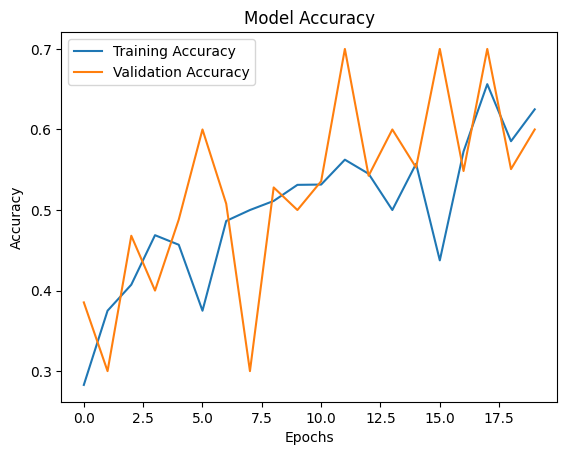

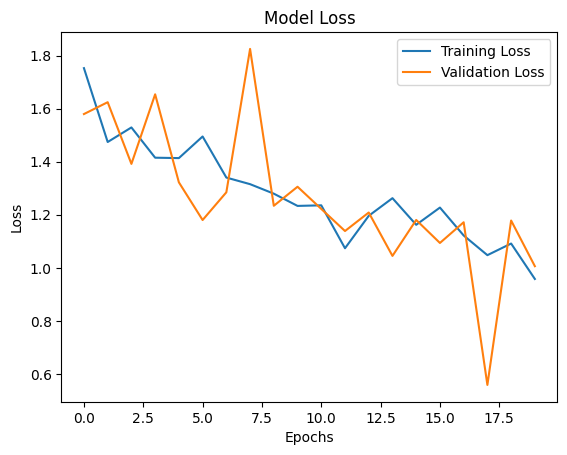

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5390 - loss: 1.2001
Test Accuracy: 0.5497353076934814
Test Loss: 1.1774688959121704


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
from tensorflow.keras.layers import Dropout, BatchNormalization

x = BatchNormalization()(x)
x = Dropout(0.5)(x)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    image_size=(64, 64),
    validation_split=0.2,  
    subset="training",  
    seed=123
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    image_size=(64, 64),
    validation_split=0.2,  
    subset="validation",  
    seed=123
)


input_layer = layers.Input(shape=(64, 64, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

 train_dataset و val_dataset
history = model.fit(train_dataset,
                    epochs=50,  
                    validation_data=val_dataset,
                    callbacks=[early_stopping])


Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2510 - loss: 4.8697 - val_accuracy: 0.3442 - val_loss: 1.6874
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3671 - loss: 1.6290 - val_accuracy: 0.3914 - val_loss: 1.5563
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4169 - loss: 1.5199 - val_accuracy: 0.4088 - val_loss: 1.5219
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4494 - loss: 1.4330 - val_accuracy: 0.4271 - val_loss: 1.4898
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4927 - loss: 1.3298 - val_accuracy: 0.4294 - val_loss: 1.5122
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5401 - loss: 1.2321 - val_accuracy: 0.4477 - val_loss: 1.5180
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5715 - loss: 1.13

In [3]:
# 
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


Training Accuracy: 0.5832027196884155
Validation Accuracy: 0.4257098138332367


In [10]:
predictions = model.predict(val_dataset)


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [11]:
predicted_classes = tf.argmax(predictions, axis=-1)


In [13]:
model.save('my_model.keras')
